In [1]:
!pip install pandas geopandas openpyxl folium

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.2 MB 2.4 MB/s eta 0:00:07
   --- ------------------------------------ 1.3/16.2 MB 2.0 MB/s eta 0:00:08
   --- ------------------------------------ 1.6/16.2 MB 1.9 MB/s eta 0:00:08
   ----- ---------------------------------- 2.1/16.2 MB 2.0 MB/s eta 0:00:07
   ------ --------------------------------- 2.6/16.2 MB 2.1 MB/s eta 0:00:07
   ------- -------------------------------- 3.1/16.2 MB 2.1 MB/s eta 0:00:07
   -------- ------------------------------- 3.4/16.2 MB 2.1 MB/s eta 0:00:07
   --------- ------------------------------ 3.9/16.2 MB 2.1 MB/s eta 0:00:06
   ----------- ---------------------------- 4.5/16.2 MB 2.2 MB/s eta 0:00:06
   ------------ --------------------------- 5.0/16.2 MB 2.2 MB/s eta 0:00:06
   ------------- -------------------------- 5.5/16.2 MB 2.2 MB/s eta 0:00:05
   ----------

In [2]:
import pandas as pd
import os

# Dossier contenant les fichiers
folder_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie"
print("Fichiers disponibles dans le dossier :", os.listdir(folder_path))


Fichiers disponibles dans le dossier : ['barrages_collinaires_beja.geojson', 'CollecteGraineBeja.geojson', 'lacs_collinaires_beja.geojson', 'man.xlsx', 'manpartgvt.xlsx', 'manpartsecteur.xlsx', 'manpartsecteur4mois.xlsx', 'mansecteur.xlsx', 'map3.geojson', 'tncirconscriptions.geojson', 'zonesindustrielles.geojson', 'z_interv_bizerte_pno4.geojson']


In [3]:
# Lire les fichiers Excel
excel_files = ["man", "manpartgvt", "manpartsecteur", "manpartsecteur4mois", "mansecteur"]
dfs = {file: pd.read_excel(os.path.join(folder_path, file + ".xlsx")) for file in excel_files}

# Afficher un aperçu des fichiers Excel
for name, df in dfs.items():
    print(f"\n{name}:")
    print(df.head())



man:
          Year  Adhésions  Approbations  Investissement (en DT)  \
0  1996 - 2000       1009           862            1.555520e+09   
1         2001        310           251            4.793000e+08   
2         2002        415           258            2.432652e+08   
3         2003        396           305            3.196579e+08   
4         2004        277           306            2.518512e+08   

   Primes (en DT)  
0    2.210687e+08  
1    6.431436e+07  
2    3.499128e+07  
3    4.899613e+07  
4    3.770582e+07  

manpartgvt:
         GVT  Dossiers approuvés   Investissements en MD  Primes en MD
0     ARIANA                  386             460.859045     61.957958
1       BEJA                   57             115.638890     12.553106
2  BEN AROUS                  667            1660.387868    216.025448
3    BIZERTE                  301             481.723771     75.674994
4      GABES                   63             168.202654     18.726077

manpartsecteur:
  Secteur  Tota

Types de données avant conversion :
 Year                       object
Adhésions                   int64
Approbations                int64
Investissement (en DT)    float64
Primes (en DT)            float64
dtype: object
Types de données après conversion :
 Year                        int64
Adhésions                   int64
Approbations                int64
Investissement (en DT)    float64
Primes (en DT)            float64
dtype: object

❌ Valeurs manquantes par colonne avant traitement :
Year                      0
Adhésions                 0
Approbations              0
Investissement (en DT)    0
Primes (en DT)            0
dtype: int64


C:\Users\Farouha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


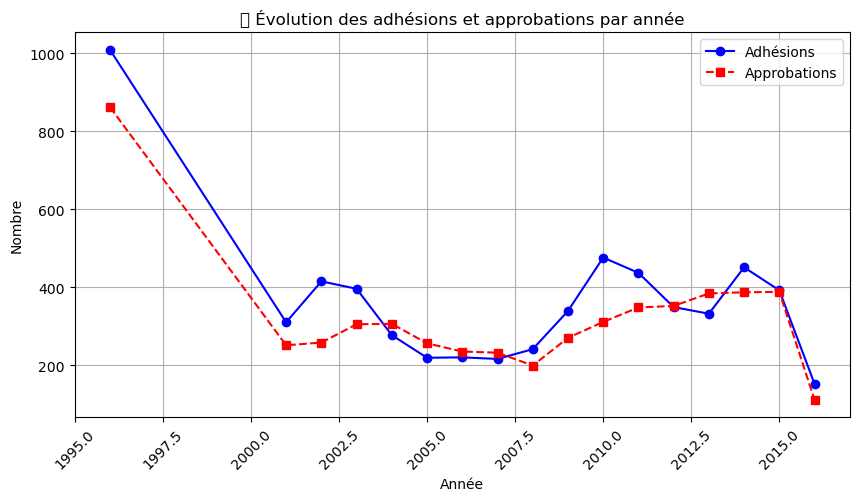

In [4]:
#analyse de fichier excel man 

import matplotlib.pyplot as plt
import seaborn as sns

#  Charger le fichier Excel
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/man.xlsx"
df = pd.read_excel(file_path)

# on va Vérifier le type de la colonne "Year" car il est de type object et on doit le convertir en int pour tracer la courbe par la suite 
print("Types de données avant conversion :\n", df.dtypes)

# Traitement de la colonne "Year"
def convert_year(value):
    """ Prend la première année dans une période '1996 - 2000' ou retourne l'année entière si c'est un nombre. """
    if isinstance(value, str):  
        return int(value.split(" - ")[0])  # Prendre la première année
    return value  # Sinon, garder la valeur telle quelle

df["Year"] = df["Year"].apply(convert_year)

# Vérification après conversion
print("Types de données après conversion :\n", df.dtypes)

#  Vérification des valeurs manquantes
print("\n❌ Valeurs manquantes par colonne avant traitement :")
print(df.isnull().sum())

# 📈 Visualisation de l'évolution des adhésions et approbations
plt.figure(figsize=(10, 5))
plt.plot(df["Year"], df["Adhésions"], marker="o", label="Adhésions", linestyle="-", color="blue")
plt.plot(df["Year"], df["Approbations"], marker="s", label="Approbations", linestyle="--", color="red")
plt.title("📊 Évolution des adhésions et approbations par année")
plt.xlabel("Année")
plt.ylabel("Nombre")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()



❌ Valeurs manquantes par colonne avant traitement :
GVT                      0
Dossiers approuvés       0
Investissements en MD    0
Primes en MD             0
dtype: int64


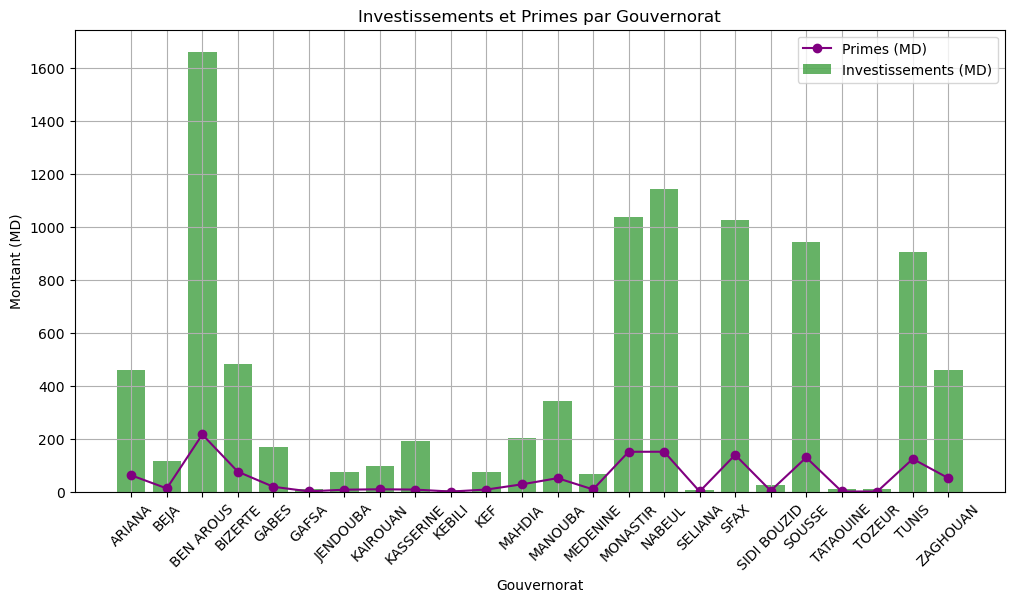

In [7]:
#analyse de fichier manpartgvt
#  Charger le fichier Excel
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/manpartgvt.xlsx"
df_gvt = pd.read_excel(file_path)

#  Vérification des valeurs manquantes
print("\n❌ Valeurs manquantes par colonne avant traitement :")
print(df_gvt.isnull().sum())

#  Visualisation des investissements et des primes par gouvernorat
plt.figure(figsize=(12, 6))
plt.bar(df_gvt["GVT"], df_gvt["Investissements en MD"], color="green", alpha=0.6, label="Investissements (MD)")
plt.plot(df_gvt["GVT"], df_gvt["Primes en MD"], marker="o", linestyle="-", color="purple", label="Primes (MD)")

plt.xlabel("Gouvernorat")
plt.ylabel("Montant (MD)")
plt.title("Investissements et Primes par Gouvernorat")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()



❌ Valeurs manquantes par colonne avant traitement :
Secteur                  0
Total adhésion           0
Dossiers approuvés       0
Investissements en MD    0
Prime octroyée en MD     0
dtype: int64


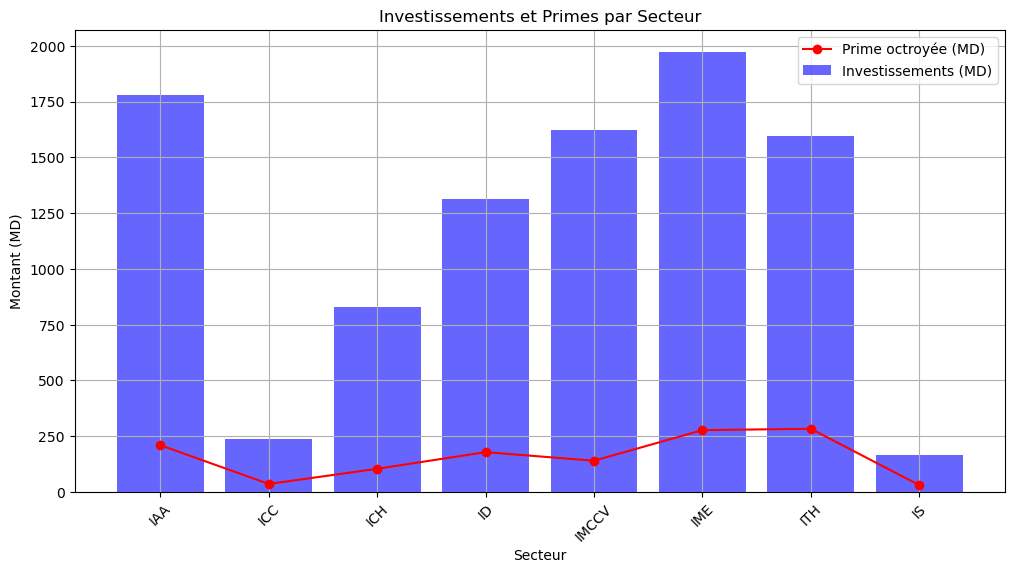

In [8]:
#analyse de fichier manpartsecteur 
#  Charger le fichier Excel
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/manpartsecteur.xlsx"
df_secteur = pd.read_excel(file_path)


#  Vérification des valeurs manquantes
print("\n❌ Valeurs manquantes par colonne avant traitement :")
print(df_secteur.isnull().sum())


#  Graphique des investissements par secteur
plt.figure(figsize=(12, 6))
plt.bar(df_secteur["Secteur"], df_secteur["Investissements en MD"], color="blue", alpha=0.6, label="Investissements (MD)")
plt.plot(df_secteur["Secteur"], df_secteur["Prime octroyée en MD"], marker="o", linestyle="-", color="red", label="Prime octroyée (MD)")

plt.xlabel("Secteur")
plt.ylabel("Montant (MD)")
plt.title("Investissements et Primes par Secteur")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()




❌ Valeurs manquantes par colonne avant traitement :
Secteur         0
Adhesion        0
Approbation     0
Prime Totale    0
Invest Total    0
dtype: int64


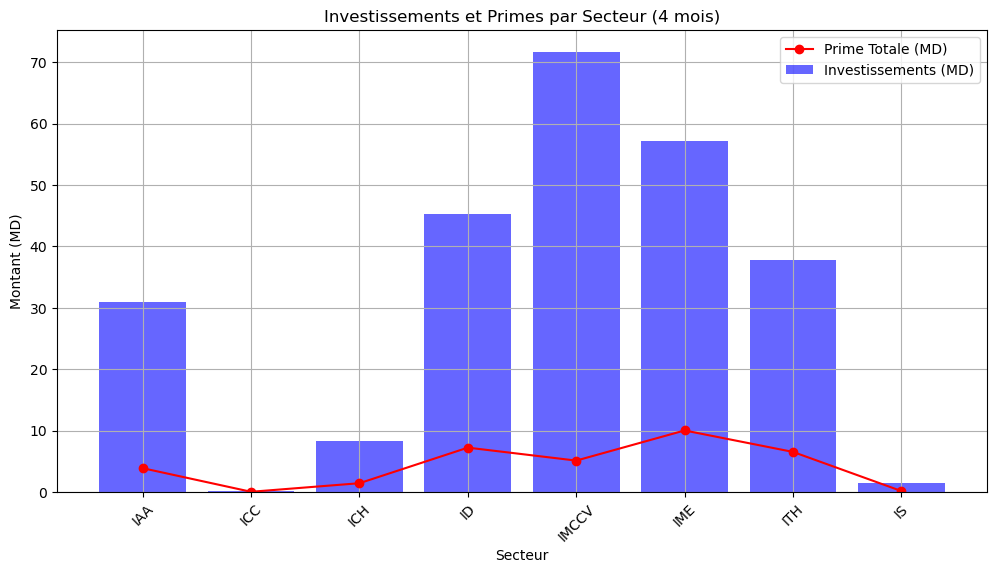

In [9]:
#analyse de fichier manpartsecteur4mois
#  Charger le fichier Excel
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/manpartsecteur4mois.xlsx"
df_secteur4mois = pd.read_excel(file_path)

# ❌ Vérification des valeurs manquantes
print("\n❌ Valeurs manquantes par colonne avant traitement :")
print(df_secteur4mois.isnull().sum())

# 📊 Graphique des investissements par secteur
plt.figure(figsize=(12, 6))
plt.bar(df_secteur4mois["Secteur"], df_secteur4mois["Invest Total"], color="blue", alpha=0.6, label="Investissements (MD)")
plt.plot(df_secteur4mois["Secteur"], df_secteur4mois["Prime Totale"], marker="o", linestyle="-", color="red", label="Prime Totale (MD)")

plt.xlabel("Secteur")
plt.ylabel("Montant (MD)")
plt.title("Investissements et Primes par Secteur (4 mois)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()



✅ Aperçu des premières lignes après nettoyage :
          Year  DOSSIERS IAA  Invest  IAA  DOSSIERS ICC  Invest ICC  \
0  1996 - 2000           137   438.330000            81   68.140324   
1         2001            25    70.810000            11   13.759872   
2         2002            22    31.026519            10    5.346814   
3         2003            56    79.775584            20   28.910381   
4         2004            32    41.026027            37   17.677488   

   DOSSIERS ICH  Invest ICH  DOSSIERS ID   Invest ID  DOSSIERS IMCCV  \
0            57  148.678965          128  188.653648              57   
1             6   12.045603           39   58.457269              14   
2            13   22.791842           30   26.911935              13   
3            11    9.623975           48   94.588042               7   
4            16   26.893764           27   48.445294              10   

   Invest IMCCV  DOSSIERS IME  Invest IME  DOSSIERS ITH  Invest ITH  \
0    243.186220     

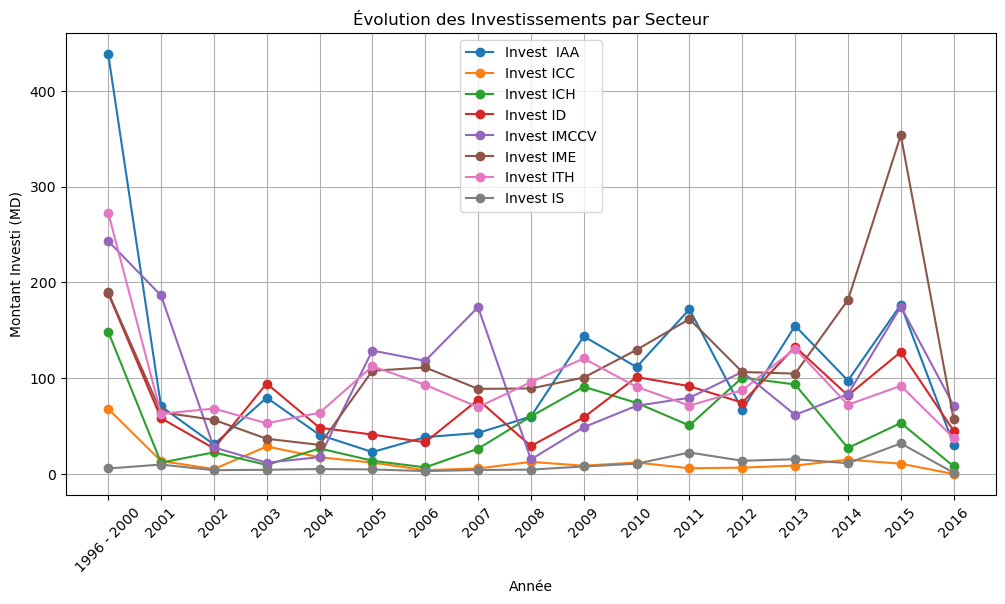

In [26]:
#analyse de fichier mansecteur 
#  Charger le fichier Excel
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/mansecteur.xlsx"
df_secteur = pd.read_excel(file_path)

# 🔄 Nettoyer les noms des colonnes (supprimer espaces)
df_secteur.columns = df_secteur.columns.str.strip()

# 🔢 Convertir la colonne "Year" en chaîne de caractères (pour éviter erreurs)
df_secteur["Year"] = df_secteur["Year"].astype(str)

# ✅ Afficher un aperçu après nettoyage
print("\n✅ Aperçu des premières lignes après nettoyage :")
print(df_secteur.head())

# ❌ Vérification des valeurs manquantes
print("\n❌ Valeurs manquantes :")
print(df_secteur.isnull().sum())


# 📊 Graphique des investissements par année
plt.figure(figsize=(12, 6))
years = df_secteur["Year"]
invest_cols = [col for col in df_secteur.columns if "Invest" in col]

for col in invest_cols:
    plt.plot(years, df_secteur[col], marker="o", linestyle="-", label=col)

plt.xlabel("Année")
plt.ylabel("Montant Investi (MD)")
plt.title("Évolution des Investissements par Secteur")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()



In [12]:
import geopandas as gpd

# Liste des fichiers GeoJSON à lire
geojson_files = [
    "barrages_collinaires_beja.geojson", "CollecteGraineBeja.geojson", "lacs_collinaires_beja.geojson",
    "map3.geojson", "tncirconscriptions.geojson", "z_interv_bizerte_pno4.geojson", "zonesindustrielles.geojson"
]

# Lire les fichiers GeoJSON et stocker les GeoDataFrames dans un dictionnaire
gdfs = {}
for file in geojson_files:
    file_path = os.path.join(folder_path, file)
    
    if os.path.exists(file_path):  # Vérifier si le fichier existe
        try:
            gdfs[file] = gpd.read_file(file_path)
            print(f"✅ {file} chargé avec succès.")
        except Exception as e:
            print(f"❌ Erreur lors de la lecture de {file}: {e}")
    else:
        print(f"⚠️ Fichier non trouvé : {file_path}")

# Afficher un aperçu des fichiers GeoJSON chargés
for name, gdf in gdfs.items():
    print(f"\n📂 {name}:")
    print(gdf.head())


✅ barrages_collinaires_beja.geojson chargé avec succès.
✅ CollecteGraineBeja.geojson chargé avec succès.
✅ lacs_collinaires_beja.geojson chargé avec succès.
✅ map3.geojson chargé avec succès.
✅ tncirconscriptions.geojson chargé avec succès.
✅ z_interv_bizerte_pno4.geojson chargé avec succès.
✅ zonesindustrielles.geojson chargé avec succès.

📂 barrages_collinaires_beja.geojson:
         name  X_COORD      Y_COORD   Nom_ar         Nom_fr  \
0      Thibar   507052   4.0399e+06    تيبار         Thibar   
1         B18   513601  4.08341e+06   الجنان    Jenan (B18)   
2         B21   518130  4.07681e+06  الجرفان  Jorfane (B21)   
3         B27   511153  4.07591e+06  العرقوب   Argoub (B27)   
4  El Kantara   553821  4.03717e+06  القنطرة      El Kantra   

   Annee_de_creation  Apport_mille_m3  Cout_mille_DT     Secteur Delegation  \
0               1987                0              0  Aïn D'fali     THIBAR   
1               1992              540            868   El Ghraba  BEJA NORD   
2   

In [27]:
#analyse de tous les fichiers



import matplotlib.pyplot as plt
import seaborn as sns
import folium


# Fonction pour afficher les statistiques des fichiers
def analyze_and_visualize(gdfs):
    for name, gdf in gdfs.items():
        print(f"\n📌 Analyse du fichier : {name}")

    
      # 1️⃣ Afficher des statistiques générales
        print(gdf.info())
        print("\n📊 Statistiques descriptives :")
        print(gdf.describe())

        # 2️⃣ Vérifier les valeurs manquantes
        missing_values = gdf.isnull().sum()
        print("\n❌ Valeurs manquantes :")
        print(missing_values[missing_values > 0])

       
        #  Carte interactive
        if gdf.geometry.iloc[0].geom_type == 'Point':
            m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], zoom_start=8)
            for _, row in gdf.iterrows():
                folium.Marker(
                    location=[row.geometry.y, row.geometry.x],
                    popup=f"{name}",
                    icon=folium.Icon(color="blue", icon="info-sign")
                ).add_to(m)
            display(m)

# Exécuter l'analyse et la visualisation
analyze_and_visualize(gdfs)




📌 Analyse du fichier : barrages_collinaires_beja.geojson
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   name               23 non-null     object  
 1   X_COORD            23 non-null     int32   
 2   Y_COORD            23 non-null     object  
 3   Nom_ar             23 non-null     object  
 4   Nom_fr             23 non-null     object  
 5   Annee_de_creation  23 non-null     int32   
 6   Apport_mille_m3    23 non-null     int32   
 7   Cout_mille_DT      23 non-null     int32   
 8   Secteur            23 non-null     object  
 9   Delegation         23 non-null     object  
 10  geometry           23 non-null     geometry
dtypes: geometry(1), int32(4), object(6)
memory usage: 1.7+ KB
None

📊 Statistiques descriptives :
             X_COORD  Annee_de_creation  Apport_mille_m3  Cout_mille_DT
count      23.000000   


📌 Analyse du fichier : CollecteGraineBeja.geojson
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Name          8 non-null      object  
 1   description   0 non-null      object  
 2   timestamp     0 non-null      object  
 3   begin         0 non-null      object  
 4   end           0 non-null      object  
 5   altitudeMode  0 non-null      object  
 6   tessellate    8 non-null      int32   
 7   extrude       8 non-null      int32   
 8   visibility    8 non-null      int32   
 9   drawOrder     0 non-null      object  
 10  icon          0 non-null      object  
 11  geometry      8 non-null      geometry
dtypes: geometry(1), int32(3), object(8)
memory usage: 804.0+ bytes
None

📊 Statistiques descriptives :
       tessellate  extrude  visibility
count         8.0      8.0         8.0
mean         -1.0      0.0        -1.0
std


📌 Analyse du fichier : lacs_collinaires_beja.geojson
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        59 non-null     object  
 1   IHPLC_ANN   59 non-null     int32   
 2   IHPLC_SBV   59 non-null     int32   
 3   IHPLC_CAP   59 non-null     int32   
 4   IHPLC_COU   59 non-null     int32   
 5   IHPLC_DELE  59 non-null     object  
 6   IHPLC_SECT  59 non-null     object  
 7   IHPLC_N     59 non-null     object  
 8   X           59 non-null     int32   
 9   Y           59 non-null     int32   
 10  geometry    59 non-null     geometry
dtypes: geometry(1), int32(6), object(4)
memory usage: 3.8+ KB
None

📊 Statistiques descriptives :
         IHPLC_ANN   IHPLC_SBV      IHPLC_CAP      IHPLC_COU              X  \
count    59.000000   59.000000      59.000000      59.000000      59.000000   
mean   1997.779661  179.949153  


📌 Analyse du fichier : map3.geojson
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   marker-color          5 non-null      object  
 1   marker-size           5 non-null      object  
 2   marker-symbol         5 non-null      object  
 3   Nom-ar                5 non-null      object  
 4   Nom-fr                5 non-null      object  
 5   capacité-mille-litre  5 non-null      object  
 6   Date-creation         5 non-null      object  
 7   Delegation            5 non-null      object  
 8   geometry              5 non-null      geometry
dtypes: geometry(1), object(8)
memory usage: 492.0+ bytes
None

📊 Statistiques descriptives :
       marker-color marker-size marker-symbol    Nom-ar     Nom-fr  \
count             5           5             5         5          5   
unique            1           1             1    


📌 Analyse du fichier : tncirconscriptions.geojson
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   circo_id    27 non-null     float64 
 1   circo_na_1  27 non-null     object  
 2   geometry    27 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 780.0+ bytes
None

📊 Statistiques descriptives :
         circo_id
count   27.000000
mean   313.666667
std    170.696762
min    111.000000
25%    156.000000
50%    310.000000
75%    425.000000
max    630.000000

❌ Valeurs manquantes :
Series([], dtype: int64)

📌 Analyse du fichier : z_interv_bizerte_pno4.geojson
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         0 non-null      object  
 1   description  1

In [32]:
#anayse de fichier lacs collinaires beja
#  Charger le fichier GeoJSON
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/lacs_collinaires_beja.geojson"
gdf = gpd.read_file(file_path)

#  1️⃣ Statistiques générales
print("\n📌 Nombre total de barrages :", len(gdf))

if "IHPLC_ANN" in gdf.columns:
    print("📌 Année de création : min =", gdf["IHPLC_ANN"].min(), ", max =", gdf["IHPLC_ANN"].max())
else:
    print("⚠️ La colonne 'IHPLC_ANN' est absente !")

if "IHPLC_CAP" in gdf.columns:
    print("📌 Capacité (mille m³) - Moyenne :", gdf["IHPLC_CAP"].mean())
else:
    print("⚠️ La colonne 'IHPLC_CAP' est absente !")



📌 Nombre total de barrages : 59
📌 Année de création : min = 1988 , max = 2011
📌 Capacité (mille m³) - Moyenne : 125796.86440677966


In [37]:
# analyse de fichier collecteGrainBeja
#  Charger le fichier GeoJSON
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/CollecteGraineBeja.geojson"
gdf = gpd.read_file(file_path)

#  Vérifier les Valeurs manquantes avant traitement
print("✔️ Valeurs manquantes avant traitement :\n", gdf.isnull().sum())

#  Remplacement des valeurs manquantes par la valeur la plus fréquente de chaque colonne
for col in ["description", "timestamp", "begin", "end", "altitudeMode", "drawOrder", "icon"]:
    if gdf[col].dtype == "object":  # Pour les colonnes de type texte/catégorielle
        mode_value = gdf[col].mode()[0] if not gdf[col].mode().empty else "Inconnu"
    else:  # Pour les colonnes numériques
        mode_value = gdf[col].mode().iloc[0] if not gdf[col].mode().empty else 0  # Remplacer par 0 si pas de mode
    gdf[col].fillna(mode_value, inplace=True)

#  Vérifier après remplissage
print("✔️ Valeurs manquantes après traitement :\n", gdf.isnull().sum())

#  1️⃣ Statistiques générales

print("📌 Nombre total de points de collecte :", len(gdf))
print("📌 Entreprises présentes :", gdf["Name"].unique())
print("📌 Nombre d'entreprises différentes :", gdf["Name"].nunique())


# Carte interactive avec Folium
m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], zoom_start=10)

for _, row in gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"{row['Name']}",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(m)

# 🗺 Afficher la carte interactive
m


✔️ Valeurs manquantes avant traitement :
 Name            0
description     8
timestamp       8
begin           8
end             8
altitudeMode    8
tessellate      0
extrude         0
visibility      0
drawOrder       8
icon            8
geometry        0
dtype: int64
✔️ Valeurs manquantes après traitement :
 Name            0
description     0
timestamp       0
begin           0
end             0
altitudeMode    0
tessellate      0
extrude         0
visibility      0
drawOrder       0
icon            0
geometry        0
dtype: int64
📌 Nombre total de points de collecte : 8
📌 Entreprises présentes : ['الشركة التعازنية المركزية للبذور COSEM'
 'الشركة التعاونية المركزية للبذور  COSEM'
 'الشركة التعاونية المركزية للزراعات الكبرى CCGC'
 'الشركة التعاونية المركزية للبذور COSEM'
 'الشركة العاونية المركزية للقمح COCEBLE'
 'مصرف الخدمات الفلاحية المتعددة CMA' 'مركز تجميع الحبوب cta']
📌 Nombre d'entreprises différentes : 7


C:\Users\Farouha\AppData\Local\Temp\ipykernel_5140\3852713609.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf[col].fillna(mode_value, inplace=True)


In [38]:
#analyse de fichier lacs collinaires beja 1 (capacite du stockage y)
#  Charger le fichier GeoJSON
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/lacs_collinaires_beja.geojson"
gdf = gpd.read_file(file_path)

#  Statistiques générales
print("\n📌 Nombre total de lacs :", len(gdf))
print("📌 Délégations concernées :", gdf["IHPLC_DELE"].unique())
print("📌 Nombre de délégations uniques :", gdf["IHPLC_DELE"].nunique())


# 🗺 Carte interactive avec Folium
m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], zoom_start=10)

for _, row in gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"{row['IHPLC_DELE']} - Capacité: {row['IHPLC_CAP']} m³",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# 🗺 Afficher la carte interactive
m



📌 Nombre total de lacs : 59
📌 Délégations concernées : ['NEFZA' 'BEJA NORD' 'GOUBELLAT' 'BEJA SUD' 'TESTOUR' 'TEBOURSOUK'
 'MEDJEZ EL BAB']
📌 Nombre de délégations uniques : 7



📌 Nombre total de barrages : 5
📌 Délégations concernées : ['Fernana' 'Ain Drahim' 'Tabarka']
📌 Nombre de délégations uniques : 3


C:\Users\Farouha\AppData\Local\Temp\ipykernel_5140\1796404337.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=gdf["Delegation"], order=gdf["Delegation"].value_counts().index, palette="coolwarm")
C:\Users\Farouha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


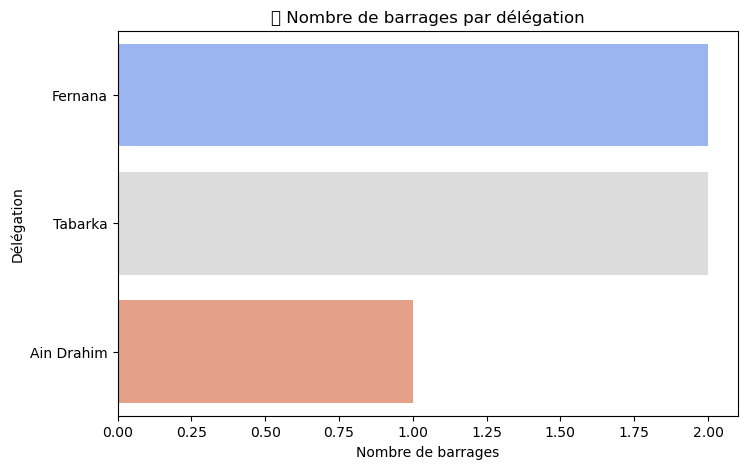

In [39]:
#analyse de fichier map3
#  Charger le fichier GeoJSON
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/map3.geojson"
gdf = gpd.read_file(file_path)

# Aperçu des données

print("\n📌 Nombre total de barrages :", len(gdf))
print("📌 Délégations concernées :", gdf["Delegation"].unique())
print("📌 Nombre de délégations uniques :", gdf["Delegation"].nunique())

#   Nombre de barrages par délégation
plt.figure(figsize=(8, 5))
sns.countplot(y=gdf["Delegation"], order=gdf["Delegation"].value_counts().index, palette="coolwarm")
plt.title("📊 Nombre de barrages par délégation")
plt.xlabel("Nombre de barrages")
plt.ylabel("Délégation")
plt.show()

# Carte interactive avec Folium
m = folium.Map(location=[gdf.geometry.y.mean(), gdf.geometry.x.mean()], zoom_start=10)

for _, row in gdf.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"{row['Nom-fr']} - Capacité: {row['capacité-mille-litre']} L",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# 🗺 Afficher la carte interactive
m


In [40]:
#analyse de fichiertncirconscriptions
#  Charger le fichier GeoJSON
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/tncirconscriptions.geojson"
gdf = gpd.read_file(file_path)

# Aperçu des données

print("\n📌 Nombre total de circonscriptions :", len(gdf))
print("📌 Liste des circonscriptions :", gdf["circo_na_1"].unique())


#   Carte interactive avec Folium
m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=7)

for _, row in gdf.iterrows():
    folium.GeoJson(
        row["geometry"],
        name=row["circo_na_1"],
        tooltip=f"Circonscription: {row['circo_na_1']}",
        style_function=lambda x: {"color": "blue", "weight": 1.5, "fillOpacity": 0.3}
    ).add_to(m)

# 🗺 Afficher la carte interactive
m



📌 Nombre total de circonscriptions : 27
📌 Liste des circonscriptions : ['Tunis 1' 'Tunis 2' 'Ariana' 'Ben Arous' 'Manubah' 'Nabeul 1' 'Nabeul 2'
 'Zaghouan' 'Bizerte' 'Béja' 'Jendouba' 'Le Kef' 'Siliana' 'Sousse'
 'Monastir' 'Mahdia' 'Sfax 1' 'Sfax 2' 'Kairouan' 'Kassérine'
 'Sidi Bou Zid' 'Gabès' 'Médenine' 'Tataouine' 'Gafsa' 'Tozeur' 'Kebili']


C:\Users\Farouha\AppData\Local\Temp\ipykernel_5140\2068326633.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=7)


In [23]:
#analyse de fichier z interv bizerte 
# Charger le fichier GeoJSON
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/z_interv_bizerte_pno4.geojson"
gdf = gpd.read_file(file_path)


# Vérifier avant remplissage
print("✔️ Valeurs manquantes après traitement :\n", gdf.isnull().sum())

# Remplacement des valeurs manquantes par la valeur la plus fréquente de chaque colonne
for col in gdf.columns:
    if gdf[col].dtype == "object":  # Pour les colonnes de type texte/catégorielle
        mode_value = gdf[col].mode()[0] if not gdf[col].mode().empty else "Inconnu"
    else:  # Pour les colonnes numériques
        mode_value = gdf[col].mode().iloc[0] if not gdf[col].mode().empty else 0  # Remplacer par 0 si pas de mode
    gdf[col].fillna(mode_value, inplace=True)

# Vérifier après remplissage
print("✔️ Valeurs manquantes après traitement :\n", gdf.isnull().sum())

# 1️⃣ Statistiques générales
print("📌 Nombre total de zones :", len(gdf))


# 3️⃣ Carte interactive avec Folium pou montrer des zones d'intervention à Bizerte
# On utilise le centroïde des polygones pour obtenir des coordonnées de latitude et longitude
m = folium.Map(location=[gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()], zoom_start=10)

for _, row in gdf.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=f"Description: {row['description']}",
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(m)

# 🗺 Afficher la carte interactive
m


✔️ Valeurs manquantes après traitement :
 Name           16
description     0
geometry        0
dtype: int64
✔️ Valeurs manquantes après traitement :
 Name           0
description    0
geometry       0
dtype: int64
📌 Nombre total de zones : 16


C:\Users\Farouha\AppData\Local\Temp\ipykernel_5140\2426312759.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  gdf[col].fillna(mode_value, inplace=True)
C:\Users\Farouha\AppData\Local\Temp\ipykernel_5140\2426312759.py:15: UserWarning: Unable to sort modes: '<' not supported between instances of 'Polygon' and 'Polygon'
  mode_value = gdf[col].mode().iloc[0] if not gdf[col].mode().empty else 0  # Remplacer par 0 si pas de mode
C:\Users\Farouha\AppData\Local\Temp\ipykernel_5140\2426312759.py:27: UserWarning: Geometry is in a 

In [24]:
#analyse de fichier zone industrielles
# Charger le fichier GeoJSON
file_path = "D:/TeraBoxDownload/DATA-VIZ/Tunisie/zonesindustrielles.geojson"
gdf_zones = gpd.read_file(file_path)

# 1️⃣ Statistiques générales sur les colonnes
print("\n📌 Nombre total de zones industrielles :", len(gdf_zones))
print("📌 Gouvernorats uniques :", gdf_zones["الولاية"].unique())
print("📌 Nombre de gouvernorats uniques :", gdf_zones["الولاية"].nunique())
print("📌 Nombre de zones industrielles par gouvernorat :")
print(gdf_zones["الولاية"].value_counts())

# 3️⃣ Statistiques sur la surface des zones industrielles (moyenne, médiane, etc.)
print("\n📌 Statistiques sur la surface des zones industrielles :")
print(gdf_zones["المساحة (هك)"].describe())

# 4️⃣ Carte interactive des zones industrielles avec Folium
m = folium.Map(location=[gdf_zones.geometry.y.mean(), gdf_zones.geometry.x.mean()], zoom_start=10)

for _, row in gdf_zones.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"Nom: {row['name']}<br>Gouvernorat: {row['الولاية']}<br>Surface: {row['المساحة (هك)']} ha",
        icon=folium.Icon(color="green", icon="info-sign")
    ).add_to(m)

#  Afficher la carte interactive
m



📌 Nombre total de zones industrielles : 152
📌 Gouvernorats uniques : ['تونس' 'منوبة' 'بن عروس' 'أريانة' 'زغوان' 'القيروان' 'جندوبة' 'الكاف'
 'باجة' 'صفاقس' 'سليانة' 'بنزرت' 'توزر' 'قفصة' 'القصرين'
 'سيدي بوزيد\u200e' 'المهديّة' 'قبلّي' 'مدنين' 'سوسة\u200e\u200e'
 'سيدي بوزيد' 'تطاوين' 'قابس' 'نابل' 'المنتسير']
📌 Nombre de gouvernorats uniques : 25
📌 Nombre de zones industrielles par gouvernorat :
الولاية
بن عروس        20
صفاقس          16
نابل           10
سوسة‎‎         10
بنزرت          10
زغوان           8
المنتسير        7
باجة            7
سليانة          7
القيروان        6
المهديّة        6
منوبة           6
قفصة            5
تونس            5
جندوبة          5
مدنين           4
أريانة          4
القصرين         3
الكاف           3
قابس            3
قبلّي           2
تطاوين          2
سيدي بوزيد‎     1
سيدي بوزيد      1
توزر            1
Name: count, dtype: int64

📌 Statistiques sur la surface des zones industrielles :
count      152
unique      59
top       10.0
freq        1